<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/joon0425/20230303/predict_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
!pip install torchviz | tail -n 1
from torchviz import make_dot
%matplotlib inline

# 예측함수의 구현

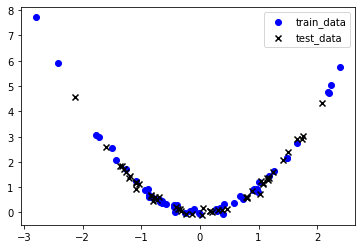

<Figure size 720x720 with 0 Axes>

In [41]:
np.random.seed(123) # 시드 설정
x=np.random.randn(100,1) # 표준 정규분포 값 행렬 100(행)*1(열)
y=x**2+np.random.randn(100,1)*0.1

# 학습 데이터
x_train=x[:50]
y_train=y[:50]
# 검증 데이터
x_test=x[50:]
y_test=y[50:]

inputs=torch.tensor(x_train).float()
labels=torch.tensor(y_train).float()
inputs_test=torch.tensor(x_test).float()
labels_test=torch.tensor(y_test).float()

plt.scatter(x_train,y_train,c='b',label='train_data')
plt.scatter(x_test,y_test,c='k',marker='x',label='test_data')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

#### Module1 : Linear1
#### Module2 : Linear1->Linear2->Linear3
#### Module3 : Linear1->ReLU->Linear2->ReLU->Linear3

In [51]:
def model_test(net,name): # model test function
  lr=0.01 # learning rate
  optimizer=optim.SGD(net.parameters(), lr=lr) # optimizer : gradient descent
  criterion=nn.MSELoss() # loss func : mean square
  num_epochs=10000 # nRepeat
  history=np.zeros((0,2))
  for epoch in range(num_epochs):
    optimizer.zero_grad() # initial gradients
    outputs=net(inputs) # predict
    loss=criterion(outputs,labels) # calc loss
    loss.backward() # calc gradients
    optimizer.step() # optimize
    if epoch%1000==0: # log history
      history=np.vstack((history,np.array([epoch,loss.item()])))
      print(f'Epoch {epoch} loss : {loss.item():.5f}')
  labels_pred=net(inputs_test)
  plt.title(name)
  plt.scatter(inputs_test[:,0].data,labels_pred[:,0].data,c='b',label='예측값')
  plt.scatter(inputs_test[:,0].data,labels_test[:,0].data,c='k',marker='x',label='정답')
  plt.legend()
  plt.show()

In [55]:
# Model definition
class Net1(nn.Module):
  def __init__(self): 
    super().__init__() # initial nn.Module
    self.l1=nn.Linear(1,1) # define output layer
  def forward(self,x): # prediction func
    x1=self.l1(x) 
    return x1 # input->Linear func
class Net2(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(1,10)
    self.l2=nn.Linear(10,10)
    self.l3=nn.Linear(10,1)
  def forward(self,x):
    x1=self.l3(self.l2(self.l1(x))) # input->Linear->Linear->Linear->output
    return x1
class Net3(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1=nn.Linear(1,10)
    self.l2=nn.Linear(10,10)
    self.l3=nn.Linear(10,1)
    self.relu=nn.ReLU(inplace=True)
  def forward(self,x):
    x1=self.l3(self.relu(self.l2(self.relu(self.l1(x))))) # input->Linear->ReLU->Linear->ReLU->Linear->output
    return x1
net1=Net1()
net2=Net2()
net3=Net3()

Epoch 0 loss : 5.16374
Epoch 1000 loss : 3.21544
Epoch 2000 loss : 3.21544
Epoch 3000 loss : 3.21544
Epoch 4000 loss : 3.21544
Epoch 5000 loss : 3.21544
Epoch 6000 loss : 3.21544
Epoch 7000 loss : 3.21544
Epoch 8000 loss : 3.21544
Epoch 9000 loss : 3.21544


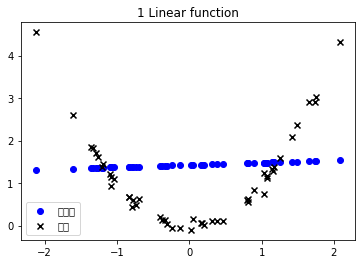

Epoch 0 loss : 4.57696
Epoch 1000 loss : 3.21544
Epoch 2000 loss : 3.21544
Epoch 3000 loss : 3.21544
Epoch 4000 loss : 3.21544
Epoch 5000 loss : 3.21544
Epoch 6000 loss : 3.21544
Epoch 7000 loss : 3.21544
Epoch 8000 loss : 3.21544
Epoch 9000 loss : 3.21544


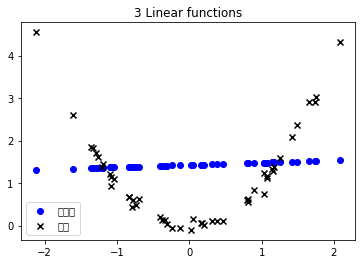

Epoch 0 loss : 5.46693
Epoch 1000 loss : 0.01733
Epoch 2000 loss : 0.00913
Epoch 3000 loss : 0.00865
Epoch 4000 loss : 0.00859
Epoch 5000 loss : 0.00856
Epoch 6000 loss : 0.00853
Epoch 7000 loss : 0.00851
Epoch 8000 loss : 0.00849
Epoch 9000 loss : 0.00847


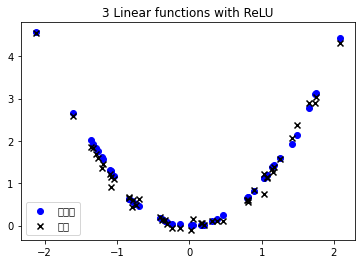

In [56]:
model_test(net1,'1 Linear function')
model_test(net2,'3 Linear functions')
model_test(net3,'3 Linear functions with ReLU')